In [1]:
import pandas as pd
import os


'/Users/miffyvo'

       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0           2005           2           2          180          180   
1           2012           2           5          150           60   
2           2013           1           7          210           30   
3           2006           2           4          240          240   
4           2002           2           5          150           90   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0          180      13        20113         8.33774               8.22186   
1          150      12

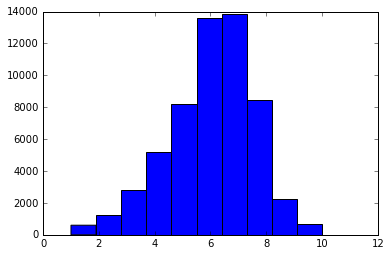

In [2]:
#read file in csv format
board_games = pd.read_csv("Game.csv")
board_games=board_games.dropna(axis=0) 
# Get rid of rows which users_rated = 0
board_games=board_games[board_games["users_rated"]> 0]
print (board_games.head(5))
# Make it in line with Perl
%matplotlib inline
import matplotlib.pyplot as plt
#histogram of "average_rating" column
plt.hist(board_games["average_rating"])
print (board_games["average_rating"].std())
print (board_games["average_rating"].mean())

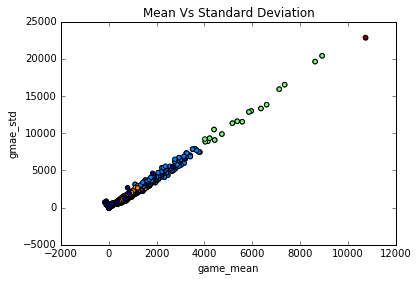

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


In [3]:
#import clustering model 
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5)
cols = list(board_games.columns)
cols.remove("name")
cols.remove("id")
cols.remove("type")
numeric = board_games[cols]
distances = kmeans_model.fit(numeric)
labels = kmeans_model.labels_

import numpy
game_mean = numeric.apply(numpy.mean, axis=1)
game_std = numeric.apply(numpy.std, axis=1)
plt.scatter(x = game_mean, y = game_std, c = labels )
plt.xlabel('game_mean')
plt.ylabel('gmae_std')
plt.title("Mean Vs Standard Deviation")
plt.show()

correlations = numeric.corr()
print (correlations["average_rating"])

56894
22.9632689649
1.0


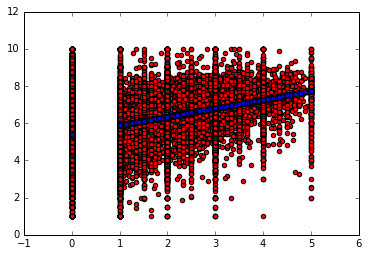

In [4]:
#import regression model 
import sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
length = board_games.shape[0]
print (length) 
x = board_games["average_weight"].reshape(length,1)
y = board_games["average_rating"].reshape(length, 1)
reg.fit(x,y)
predictions = reg.predict(x)
plt.scatter(x, y, c='red')
plt.scatter(x, predictions, c='blue')


from sklearn.metrics import mean_squared_error
mse = mean_squared_error(x, predictions)
print(mse)


rmse = mse ** (1/2)
print(rmse)